# A beginner's look at scikit learn

**Confession** : The title is somewhat misleading.

We'll be doing much more than look at the [scikit-learn tutorials](http://scikit-learn.org/stable/tutorial/index.html). My purpose is to initiate _exploration_ and _understanding_ of the underlying ideas found in this machine learning library. For brevity, I assume the reader is already familiar with basic machine learning concepts (e.g. supervised vs unsupervised learning) and so I won't spend time talking about how major algorithms work. Far more important, I think, is getting a feel for the workflow and seeing what options are available to you. 

So consider this less of a tutorial and more like an experiment. I write as if the reader has roughly the same background as me (that is to say, informal dabbling). We'll take detours, supply more information to details, and play around with features. In fact, that's exactly what I did when writing this page up...since I'm also new to IPython. With that said, let's start!


## Extended Example: Irises

We begin with the "Hello, World!" of classification datasets: Fisher's irises. 

In [1]:
import numpy as np
from sklearn import datasets

# Fisher's iris dataset -- like the one in R
iris = datasets.load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

Scikit includes a few default datasets. Unlike R (for those familiar with the language), python's datasets are actually dictionaries. Use tab-completion to see the attributes for _iris_. As you might have guessed, DESCR provides us a description of the data set along with [other information.](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)

### Classification: K-Nearest Neighors

Okay, time for some actual machine learning! This dataset is in two parts: the data containing the sepal and 
petal measurements, and the labels telling us what flower each observation is. These are found in the _data_ and
_target_ attributes, respectively. So let's load them up and split our observations into a train and test set.

In [2]:
np.random.seed(0)

iris_X = iris.data
iris_Y = iris.target

# Returns a permutation of the 150 instances
indices = np.random.permutation(len(iris_X))

X_train = iris_X[indices[:-10]]
y_train = iris_Y[indices[:-10]]

X_test = iris_X[indices[-10:]]
y_test = iris_Y[indices[-10:]]

print(X_test, y_test)

[[ 5.6  3.   4.1  1.3]
 [ 5.9  3.2  4.8  1.8]
 [ 6.3  2.3  4.4  1.3]
 [ 5.5  3.5  1.3  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.9  3.1  1.5  0.1]
 [ 6.3  2.9  5.6  1.8]
 [ 5.8  2.7  4.1  1. ]
 [ 7.7  3.8  6.7  2.2]
 [ 4.6  3.2  1.4  0.2]] [1 1 1 0 0 0 2 1 2 0]


Good, so we're ready to train our classifier. 

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Give your classifier the training data along with correct labels
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski', 
                     metric_params = None, n_neighbors = 5, p = 2, weights = 'uniform')

n = len(X_test)
predict = knn.predict(X_test)
correct = sum(predict == y_test)

print('n = {0}'.format(n))
print('Percent correct: {0:.2f} %'.format(100 * correct / n))


n = 10
Percent correct: 90.00 %


Not bad for a first try. So let's figure out what we just did. 

We assign a classifier to the variable _knn_. As an estimator object, _knn_ implements the fit() and predict() methods, which we use train and test our sets, respectively. The general flow we have thus far is this:

1. Load our libraries and data
2. Process and split our datasets into training, test sets, etc.
3. Create a classifier object (with desired settings)
4. Give our classifier the training data ('Fit' the estimator / Train)
5. Predict our test sets
6. Get results

Pretty simple, right? Of course, the bulk of the work has been done for us in preparing the dataset. In the real world, getting data in the right form (aka data wrangling) will preoccupy most of our time. Nonetheless, it is extremely important to understand how to tweak our models to get better performance. So let's talk about the parameters we gave to the classifier.

Parameter _algorithm_ has four options:

- 'brute' for a brute force search
- 'ball_tree' for constructing a ball tree
- 'kd_tree' for constructing a kd-tree
- 'auto' for the lazy ;) 

In all seriousness, 'auto' lets the model decide which implementation will work best given the training set you passed into the fit method. To read about the algorithms in semi-detail, consult the [user guide.](http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms) As an aside, the user guide is _very_ helpful and will aid your decision-making on parameter choice. 

Next, leaf_size. The rule of thumb is that a higher leaf_size uses less memory and makes tree construction faster (assuming no brute force). The tradeoff is query time, which by default is set to 30. 

Moving on...metrics. Scikit handles its metrics in a class called, you guessed it, [DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html). Notice that we could've chosen any one of those metrics in the real-valued vector spaces table. Later, we'll experiment to see if this improves or weakens our predictive accuracy. Now, for those unfamiliar with the Minkowski metric, we present it below:


Let $ X = (x_{1}, x_{2}, ... , x_{n}), Y = (y_{1}, y_{2}, ..., y_{n}) $ be vectors in $\mathbb{R}^{n}$.
Then the $\textbf{Minkowski distance}$ of $X$ and $Y$ is:
   
$$ d(X, Y) = \Big(\sum_{i = 1}^{n} |x_{i} - y_{i}|^{p} \Big)^{1/p} $$

In the above classifier, we set $p = 2$, which is the equivalent to the Euclidean metric.


The _n_neighbors_ parameter is pretty straightforward. This is the number of neighbors we compare our point to when predicting its label. By default, we look at the 5 closest neighbors. However, this leads us to our next issue: do we simply tally up the labels of a point's neighbors and go with a majority vote? Or, do we weight the closest neighbor more highly than the fifth closest neighbor? This is what the _weights_ parameter handles. For majority vote, go with 'uniform', and for weighing points by closeness, go with 'distance'. If you're clever, you can even make up your own rule and pass it in as a callable function.


#### Plotting our decision boundary

To visualize our data, let's run the KNN Classifier twice: the first just using sepal length and width, 
and the second using petal length and width. This allows us to plot our data and see the decision boundary.  We'll keep the same training sets as before.

Populating the interactive namespace from numpy and matplotlib


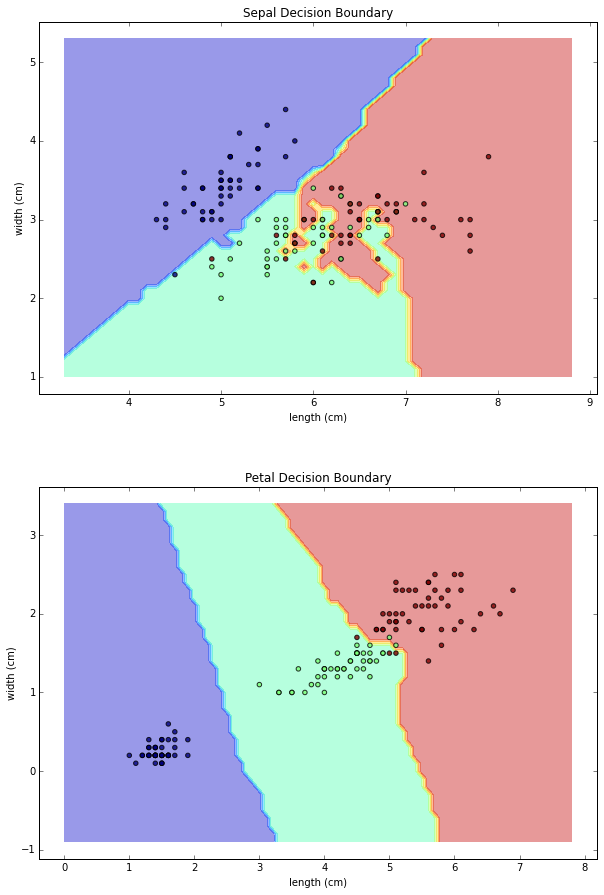

In [19]:
%pylab inline

import matplotlib.pyplot as plt

def run_and_plot(train, title):
    # Train
    knn = KNeighborsClassifier()
    knn.fit(*train)
    
    # Decision regions
    mins = np.apply_along_axis(min, 0, train[0])
    maxs = np.apply_along_axis(max, 0, train[0])
    
    xx, yy = np.meshgrid( np.arange(mins[0] - 1, maxs[0] + 1, 0.1),
                          np.arange(mins[1] - 1, maxs[1] + 1, 0.1))

    # Predict
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Set up plot
    plt.contourf(xx, yy, Z, alpha = 0.4)
    plt.scatter(train[0][:, 0], train[0][:, 1], c = train[1], alpha = 0.8)
    plt.xlabel('length (cm)')
    plt.ylabel('width (cm)')
    plt.title(title)
    
# Data    
sepal = X_train[:, :2]
petal = X_train[:, 2:]

# 2 x 1 plot grid
plt.figure(figsize = (10,15))
plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace = 0.25)

# Sepal
run_and_plot((sepal, y_train), 'Sepal Decision Boundary')    

# Second plot
plt.subplot(2, 1, 2)

# Petal
run_and_plot((petal, y_train), 'Petal Decision Boundary')
    
plt.show()


Even with two features, our classifier does a great job separating our three species of iris. 